In [ ]:
"""
An example of image augmentation for ConvNets.
"""

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

from sklearn.metrics import classification_report, confusion_matrix

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


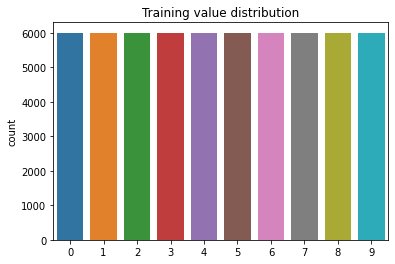

In [2]:
#Load data

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

train_images=train_images.reshape(-1,28,28,1)
test_images=test_images.reshape(-1,28,28,1)
print(train_images.shape)
sns.countplot(train_labels)
plt.title("Training value distribution")
plt.show()

In [3]:
#Set parameters
BATCH=100
EPOCHS=50
IMG_SIZE=(28,28,1)
STEPS=train_images.shape[0]//BATCH
VAL_STEPS=test_images.shape[0]//BATCH
NUM_CLASSES=10

In [4]:
train_img_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,rotation_range=50,width_shift_range=0.5,height_shift_range=0.5,
                                                          shear_range=0.5,zoom_range=0.5,horizontal_flip=True,fill_mode='nearest')
train_gen=train_img_gen.flow(train_images,train_labels,batch_size=BATCH)

val_img_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
val_gen=val_img_gen.flow(test_images,test_labels,batch_size=BATCH)

In [5]:
#Define model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3,),activation='relu',padding='valid',input_shape=(IMG_SIZE)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3,),activation='relu',padding='valid'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(NUM_CLASSES,activation='softmax'))

model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [6]:
history=model.fit_generator(train_gen,epochs=EPOCHS,steps_per_epoch=STEPS,validation_data=val_gen, validation_steps=VAL_STEPS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
600/600 [==============================] - 39s 48ms/step - loss: 1.8396 - accuracy: 0.3118 - val_loss: 1.1764 - val_accuracy: 0.5485
Epoch 2/50
600/600 [==============================] - 30s 49ms/step - loss: 1.4907 - accuracy: 0.4497 - val_loss: 1.0247 - val_accuracy: 0.6101
Epoch 3/50
600/600 [==============================] - 28s 47ms/step - loss: 1.3537 - accuracy: 0.5038 - val_loss: 0.8894 - val_accuracy: 0.6742
Epoch 4/50
600/600 [==============================] - 28s 47ms/step - loss: 1.2818 - accuracy: 0.5327 - val_loss: 0.9816 - val_accuracy: 0.6253
Epoch 5/50
600/600 [==============================] - 28s 47ms/step - loss: 1.2257 - accuracy: 0.5533 - val_loss: 0.9192 - val_accuracy: 0.6552
Epoch 6/50
600/600 [==============================] - 28s 46ms/step - loss: 1.1895 - accuracy: 0.5645 - val_loss: 0.9006 - val_accuracy: 0.6615
Epoch 7/50
600/600 [==============================] - 28s 46ms/step - loss: 1.1490 - accuracy: 0.5815 - val_loss: 0.8399 - val_accuracy:

In [7]:
epochs=history.epoch
history=history.history

print("Best epoch",epochs[np.argmin(history['val_loss'])])

Best epoch 30


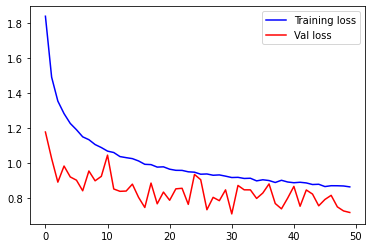

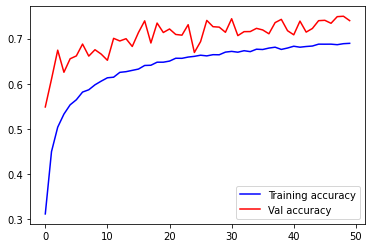

In [8]:
plt.plot(epochs,history['loss'],'-b',label='Training loss')
plt.plot(epochs,history['val_loss'],'-r',label='Val loss')
plt.legend()
plt.show()
plt.plot(epochs,history['accuracy'],'-b',label='Training accuracy')
plt.plot(epochs,history['val_accuracy'],'-r',label='Val accuracy')
plt.legend()
plt.show()